# Water Quality Prediction System (Rwanda Chapter)

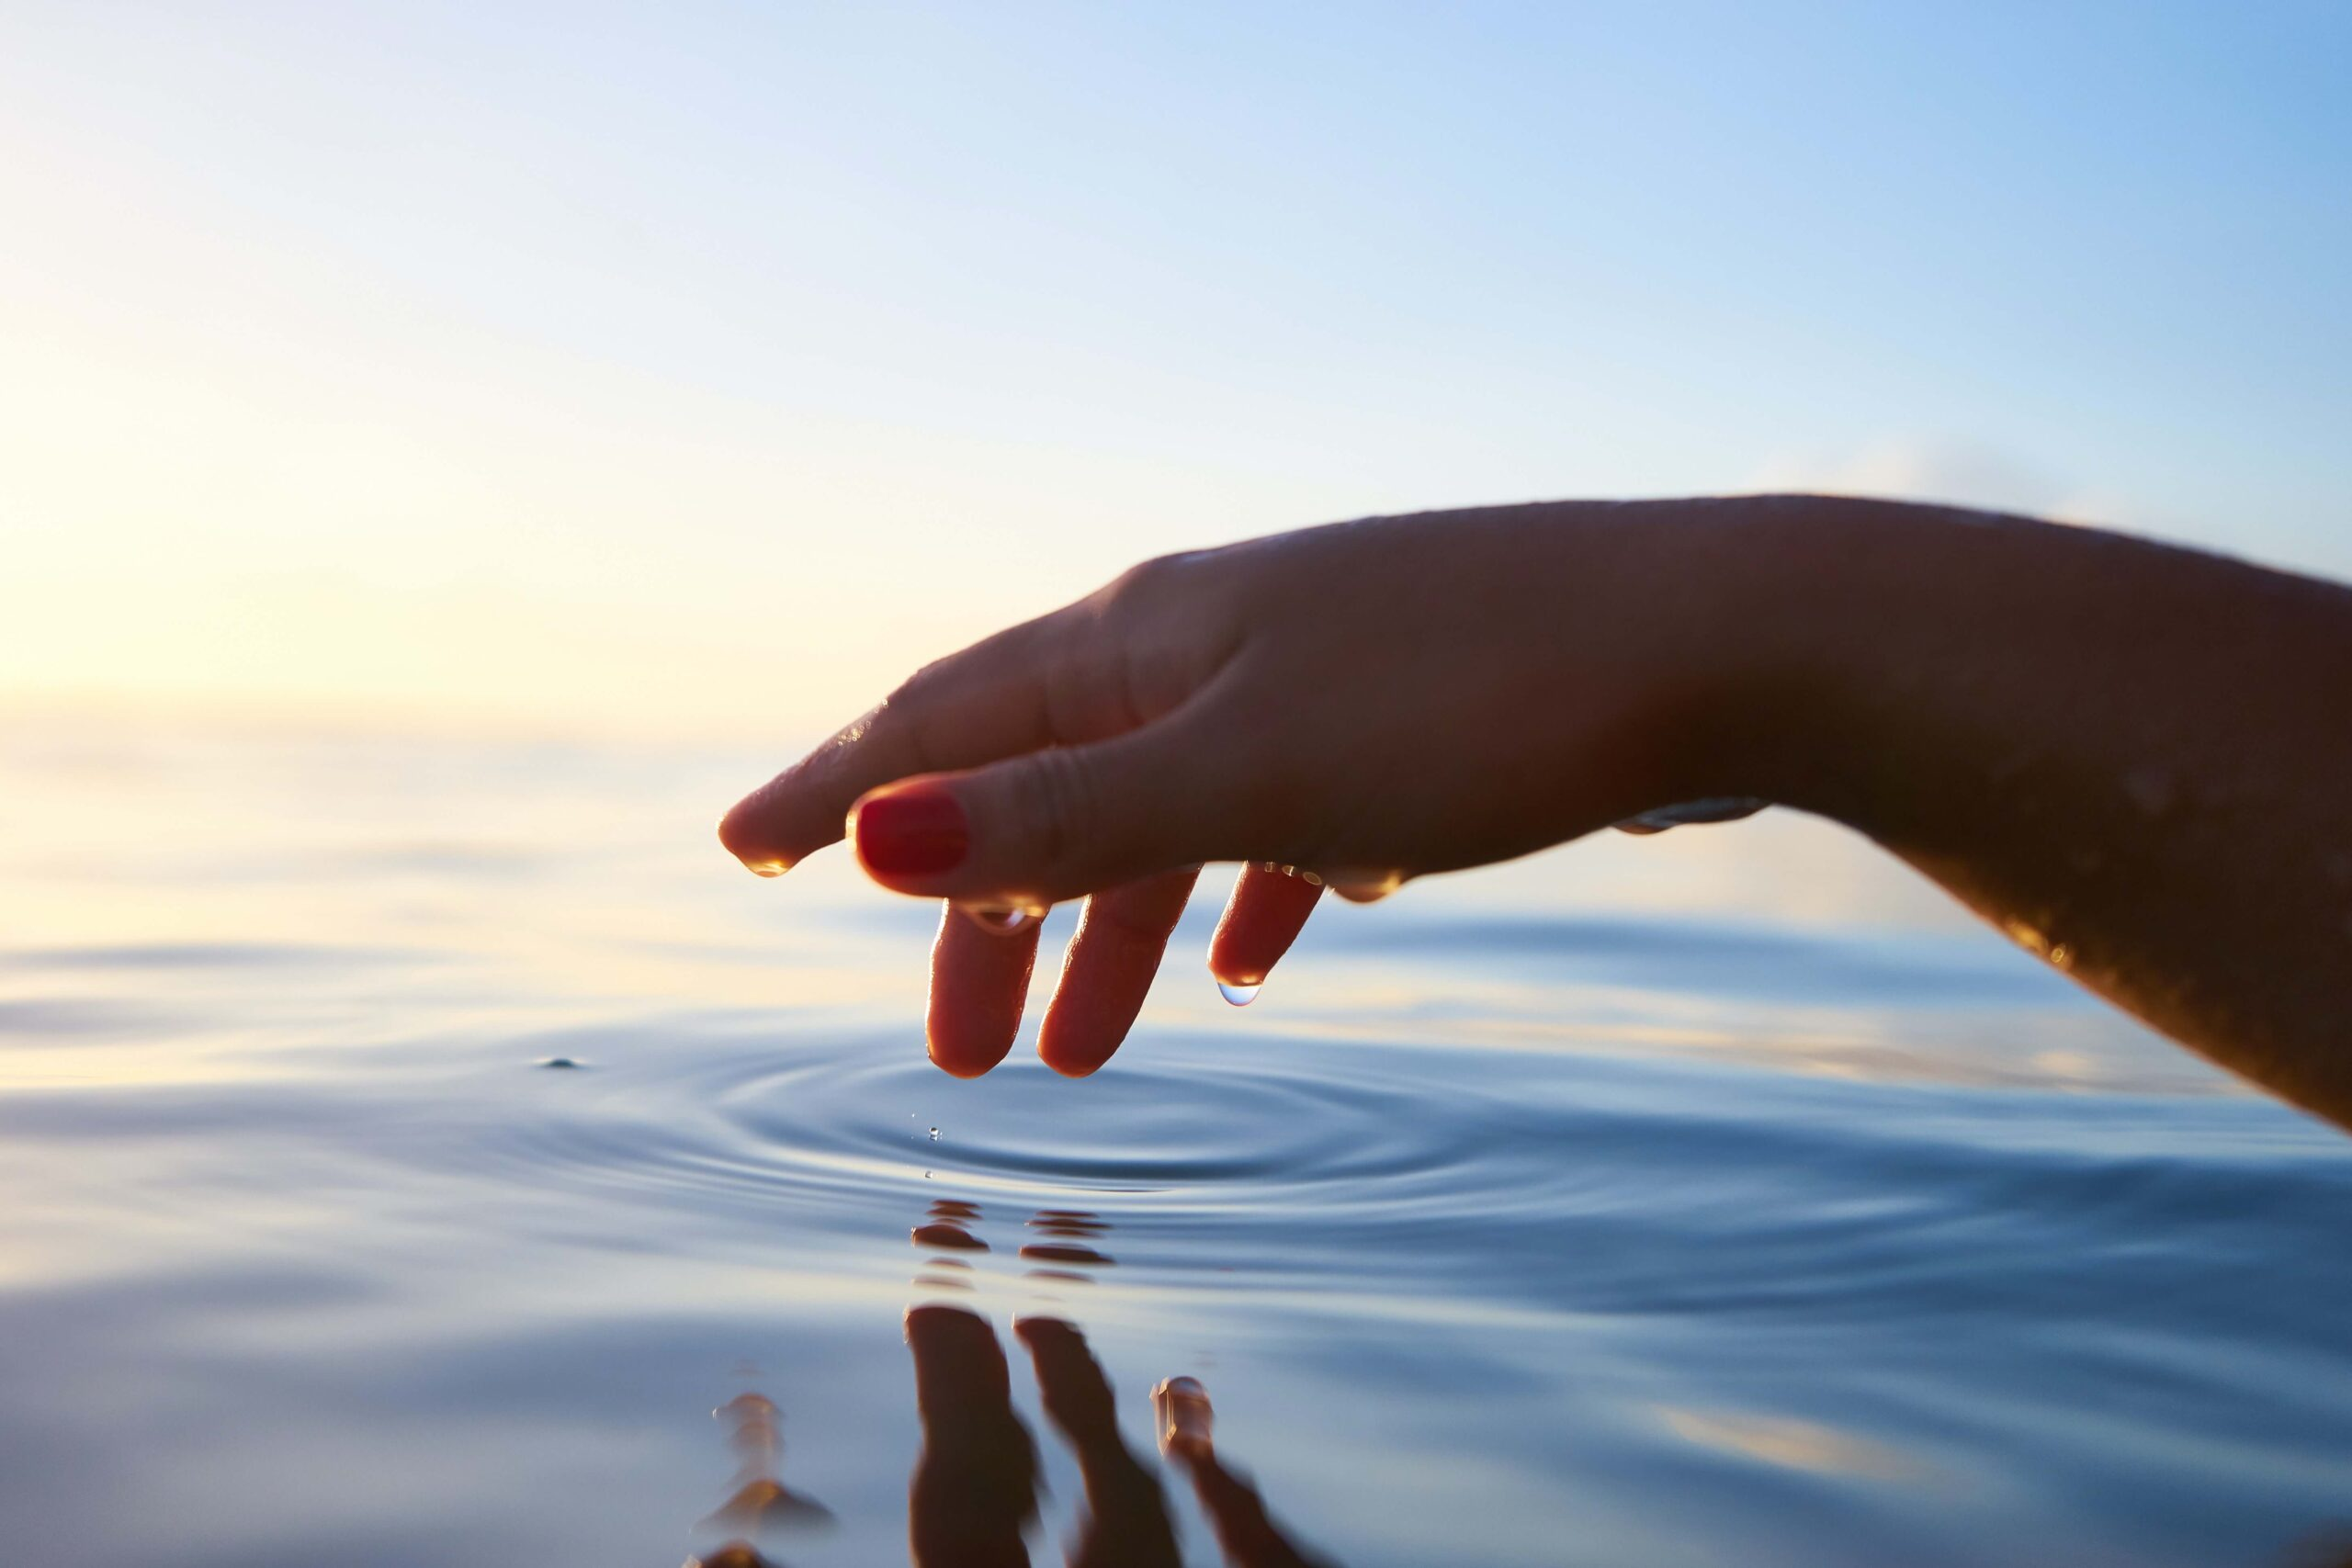

### Life Cycle or machine learning project

* Research previous work and Data Collection
* Data Collection
* Exploratory Data Analysis
* Preprocessing and feature engineering
* Model Development
* Model Training
* Model Analysis and Interpretation
* App Development


## 1.) Project Problem Statement

* Access to clean water is a critical challenge in many parts of the world, including Rwanda. Water quality prediction is important for ensuring the availability of safe and clean water for drinking, agriculture, and other purposes.
* However, traditional methods for water quality prediction are often time-consuming and costly, and they may not provide accurate and timely information. 
* To address this challenge, the Omdena Rwanda Chapter has initiated a project to develop an automated water quality prediction system using machine learning.

## 2.) Data Collection

* Data Source: https://drive.google.com/drive/folders/1_KJ09bHckVYVG_2ZHbRHIDCVtM04wpZI?usp=sharing
* The data consists of 18 columns and 10001 rows. 

## 2.1 Import Data and Required Libraries

#### NumPy, Pandas, Matplotlib, Seaborn, Warings Library and scikit learn

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/chhot/Desktop/demo/ML_Project/notebook/data/Synthetic_Data_Water_Quality.csv")

## Show Top 5 Records

In [3]:
df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


## Shape of the dataset

In [4]:
df.shape

(10000, 18)

## 2.2.) Dataset information
* pH
* Aluminium (mg/l)
* Chloride (mg/l)
* Iron (mg/l)
* Sulphate (mg/l)
* Zinc (mg/l)
* Magnesium (mg/l)	
* Calcium (mg/l)	
* Potassium (mg/l)	
* Nitrate (mg/l)	
* Phosphate (mg/l)
* Potability -> (potable/non-potable)

# 3.) Data Checks to perform


* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
* Distribution of the Potability column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Colour (TCU)                      0
Turbidity (NTU)                   0
pH                                0
Conductivity (uS/cm)              0
Total Dissolved Solids (mg/l)     0
Total Hardness (mg/l as CaCO3)    0
Aluminium (mg/l)                  0
Chloride (mg/l)                   0
Total Iron (mg/l)                 0
Sodium (mg/l)                     0
Sulphate (mg/l)                   0
Zinc (mg/l)                       0
Magnesium (mg/l)                  0
Calcium (mg/l)                    0
Potassium (mg/l)                  0
Nitrate (mg/l)                    0
Phosphate (mg/l)                  0
Potability                        0
dtype: int64

***There are no missing values in the dataset***

### 3.2) Check Duplicates

In [6]:
df.duplicated().sum()

0

***There are no duplicates values in the data set***

### 3.3) Check data types

In [7]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Colour (TCU)                    10000 non-null  float64
 1   Turbidity (NTU)                 10000 non-null  float64
 2   pH                              10000 non-null  float64
 3   Conductivity (uS/cm)            10000 non-null  float64
 4   Total Dissolved Solids (mg/l)   10000 non-null  float64
 5   Total Hardness (mg/l as CaCO3)  10000 non-null  float64
 6   Aluminium (mg/l)                10000 non-null  float64
 7   Chloride (mg/l)                 10000 non-null  float64
 8   Total Iron (mg/l)               10000 non-null  float64
 9   Sodium (mg/l)                   10000 non-null  float64
 10  Sulphate (mg/l)                 10000 non-null  float64
 11  Zinc (mg/l)                     10000 non-null  float64
 12  Magnesium (mg/l)                1

### 3.4) Checking the number of unique values of each column

In [8]:
df.nunique()

Colour (TCU)                      2907
Turbidity (NTU)                   1001
pH                                1375
Conductivity (uS/cm)              9824
Total Dissolved Solids (mg/l)     9745
Total Hardness (mg/l as CaCO3)    9218
Aluminium (mg/l)                    41
Chloride (mg/l)                   9049
Total Iron (mg/l)                   61
Sodium (mg/l)                     8811
Sulphate (mg/l)                   9386
Zinc (mg/l)                       1001
Magnesium (mg/l)                  7931
Calcium (mg/l)                    8488
Potassium (mg/l)                  6293
Nitrate (mg/l)                    6033
Phosphate (mg/l)                   441
Potability                           2
dtype: int64

### 3.5) Check statistics of data set

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Colour (TCU),10000.0,15.006526,8.717615,0.01,7.5175,15.000,22.6600,30.00
Turbidity (NTU),10000.0,5.003388,2.906118,0.00,2.4900,5.000,7.5300,10.00
pH,10000.0,7.337763,3.101412,0.00,6.3975,7.470,8.4800,14.00
Conductivity (uS/cm),10000.0,1502.148272,869.812955,0.12,741.6350,1500.095,2259.7400,2999.91
Total Dissolved Solids (mg/l),10000.0,1001.183584,578.522848,0.05,494.5900,1000.030,1497.8800,1999.96
Total Hardness (mg/l as CaCO3),10000.0,300.613398,171.478482,0.03,154.9800,300.005,448.6050,599.97
Aluminium (mg/l),10000.0,0.200808,0.115359,0.00,0.1000,0.200,0.3000,0.40
Chloride (mg/l),10000.0,249.491721,144.526095,0.00,122.7075,249.915,374.7600,499.87
Total Iron (mg/l),10000.0,0.300165,0.174572,0.00,0.1500,0.300,0.4500,0.60
Sodium (mg/l),10000.0,200.793553,116.039382,0.01,99.8900,199.995,303.6450,399.98


#### Insight

* From above description of numerical data, all means are very close to each other - between 2.20 and 1502.14;
* All standard deviations are also close - between 1.27 and 869.81;
* While there is a minimum score 0 and maximum score 2999.91

### 3.6) Exploring Data

In [10]:
df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


### 3.7) Find unique values in a column

In [11]:
print("Categories in 'potability' variable: ",end=" " )
print(df['Potability'].unique())

Categories in 'potability' variable:  ['potable' 'non-potable']


### 3.8) Define numerical and categorical columns in our dataset

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features :   {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features :   {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features :   ['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)', 'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)', 'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)', 'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)', 'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)', 'Phosphate (mg/l)']

We have 1 categorical features :   ['Potability']


### 3.9) Distribution of the Potability column

In [13]:
df['Potability'].value_counts()

potable        5000
non-potable    5000
Name: Potability, dtype: int64

### 3.10) column names in the dataset

In [14]:
df.columns

Index(['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability'],
      dtype='object')

### 3.11) Extract Good_minerals and Bad_minerals in the dataset

In [15]:
# Extract columns based on two categories
extracted_columns = df[['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability']] 

# Access the extracted columns
Good_minerals = extracted_columns.loc[:, ['Calcium (mg/l)', 'Potassium (mg/l)' ,'Zinc (mg/l)', 'Magnesium (mg/l)']].sort_values(["Calcium (mg/l)"], ascending=[True])
Bad_minerals = extracted_columns.loc[:, ['Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)', 'Sodium (mg/l)', 'Sulphate (mg/l)']].sort_values([ 'Sodium (mg/l)'], ascending=[True])

# print the output
print(Good_minerals)
print(Bad_minerals)

      Calcium (mg/l)  Potassium (mg/l)  Zinc (mg/l)  Magnesium (mg/l)
4898            0.02             42.34         0.28             67.74
584             0.04              3.82         4.09             65.77
3140            0.05             30.00         4.67             66.19
975             0.06              0.21         0.05             79.85
3150            0.10             43.94         0.12             61.23
...              ...               ...          ...               ...
8990          299.79             73.76         7.23            105.76
8782          299.82             98.51         9.42            180.39
6681          299.84             96.32         5.08            167.07
6799          299.94             90.36         9.84            133.27
9581          299.97             64.13         5.71            118.18

[10000 rows x 4 columns]
      Aluminium (mg/l)  Chloride (mg/l)  Total Iron (mg/l)  Sodium (mg/l)  \
1761              0.18            46.51               0.1

## Good minerals range in water
* *Calcium (mg/l) quantity is 0.02(min) to 299.97(max)*
* *Potassium (mg/l) quantity is 0.00(min) to 100.00(max)*
* *Zinc (mg/l) quantity is 0.00(min) to 10.00(max)*
* *Magnesium (mg/l) quantity is 0.030(min) to 199.98(max)*

## Bad minerals range in water
* *Aluminium  (mg/l) quantity is 0.00(min) to 0.400(max)*
* *Chloride  (mg/l) quantity is 0.00(min) to 499.87(max)*
* *Total Iron (mg/l) quantity is 0.00(min) to 0.600(max)*
* *Sodium (mg/l) quantity is 0.010(min) to 399.98(max)*
* *Sulphate (mg/l) quantity is 0.030(min) to 799.88(max)*

In [16]:
 df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


## 4.) Exploring Data ( Visualization )
### 4.1 Visualize pH distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)



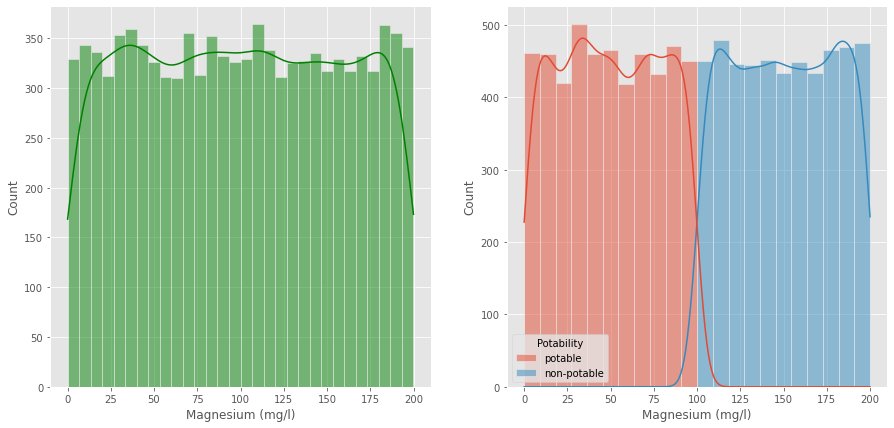

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Magnesium (mg/l)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Magnesium (mg/l)',kde=True,hue='Potability')
plt.show()

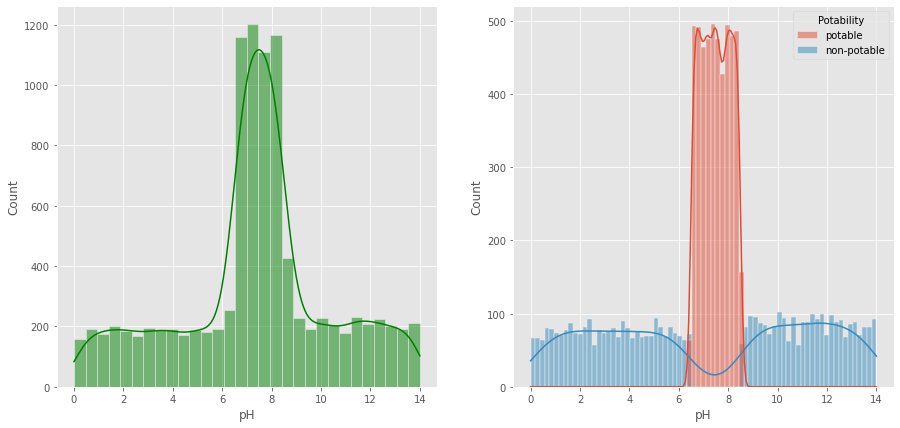

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='pH',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='pH',kde=True,hue='Potability')
plt.show()

#### *Insight: Potable is high `pH`* 

### 4.2) Point plot show pH with Potability

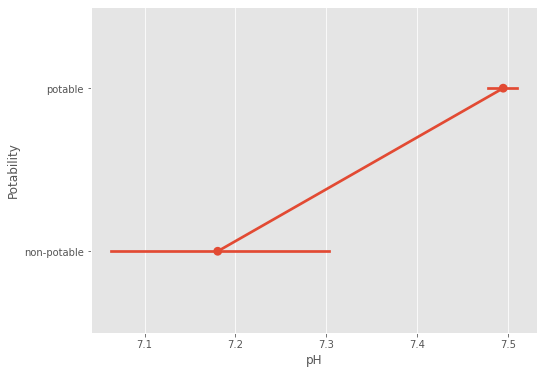

In [28]:
plt.figure(figsize=(8,6))
sns.pointplot(x='pH',y='Potability',data=df)
plt.show()

#### *# Insight: potable is low and non-potable is high in `Potassium (mg/l)`*

### 4.3) Pair Plot with two good minerals

<Figure size 576x432 with 0 Axes>

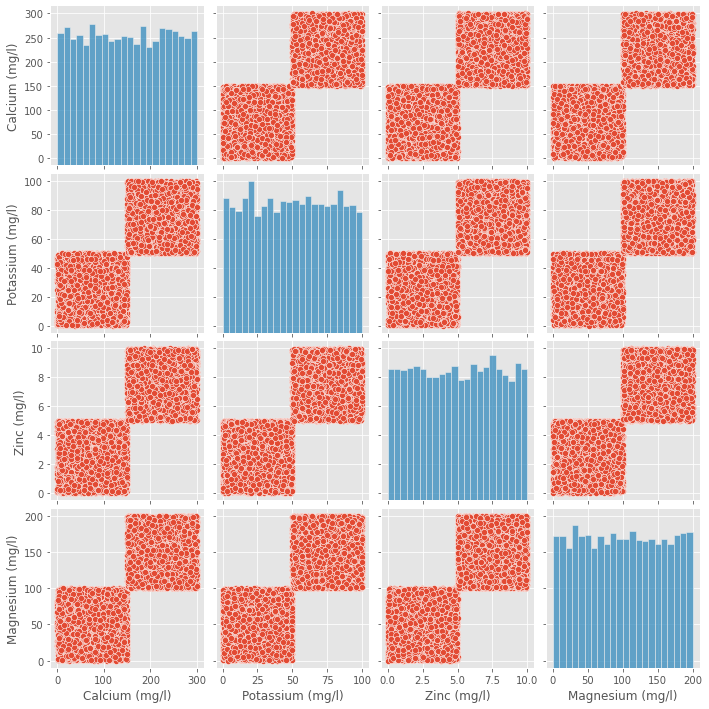

In [20]:
plt.figure(figsize=(8,6))
sns.pairplot(df,vars= ['Calcium (mg/l)', 'Potassium (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)'] , palette='Blues_d')
plt.show()

### 4.4) Pair Plot with two bad minerals

<Figure size 576x432 with 0 Axes>

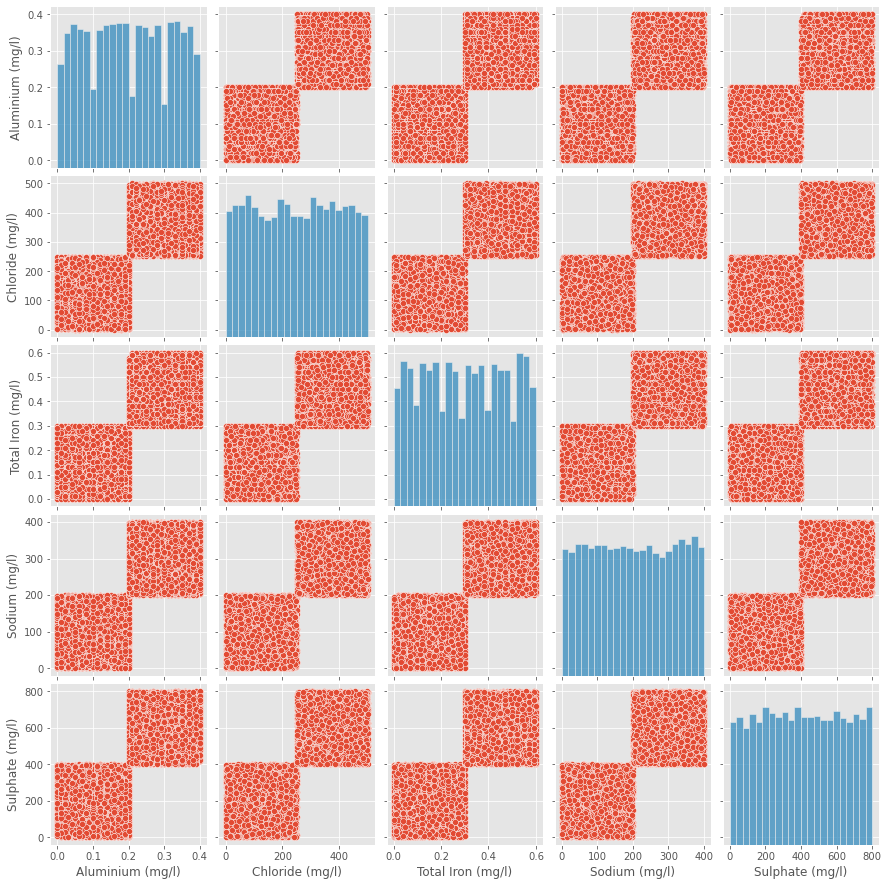

In [21]:
plt.figure(figsize=(8,6))
sns.pairplot(df,vars= ['Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)', 'Sodium (mg/l)', 'Sulphate (mg/l)'] , palette='Blues_d')
plt.show()

### 4.5) Bar Plot

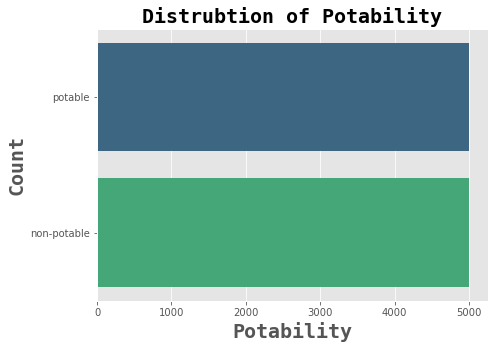

In [22]:
Potability = df['Potability'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(Potability.values, Potability.index, palette='viridis')
plt.title('Distrubtion of Potability', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Potability', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.tick_params(labelsize=10)
plt.show()

## 4.6) Correlation Matrix

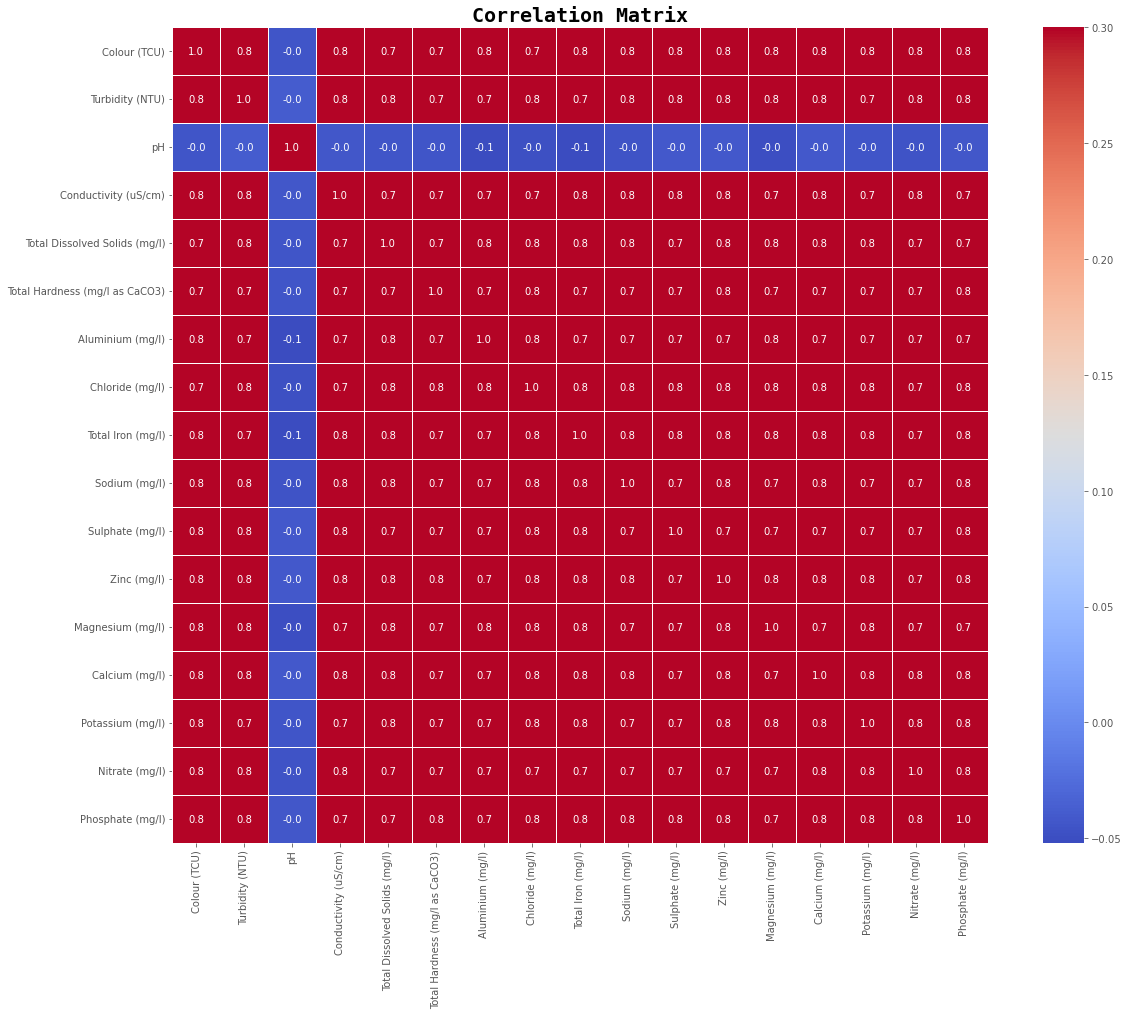

In [23]:
# Heatmap with correlation matrix
corr = df.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, vmax=0.3,
            cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Correlation Matrix', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

### 4.7) Dis plot with Good_minerals

In [24]:
cols = []
for g_col in Good_minerals.columns:
    if df[g_col].dtype == float:
        cols.append(g_col)
        
cols

['Calcium (mg/l)', 'Potassium (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)']

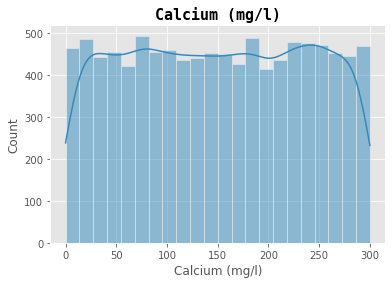

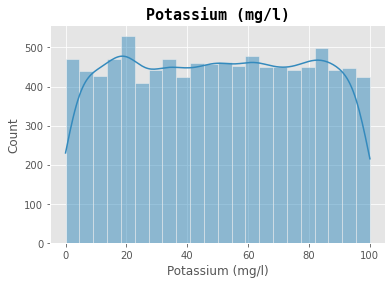

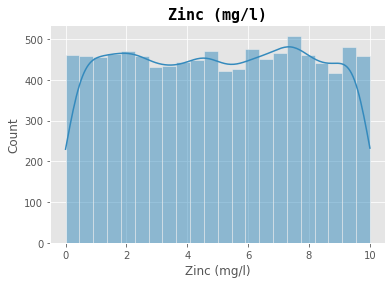

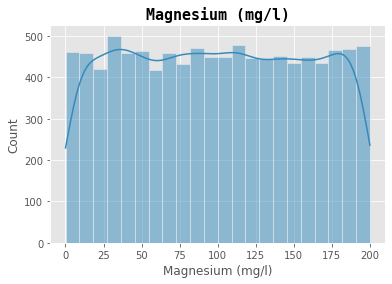

In [25]:
for g_col in cols:
    plt.figure()
    sns.histplot(data=df, x=g_col, kde=True)
    plt.title(g_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

### 4.8) Dist plot with Bad_minerals

In [26]:
cols = []
for b_col in Bad_minerals.columns:
    if df[b_col].dtype == float:
        cols.append(b_col)
        
cols

['Aluminium (mg/l)',
 'Chloride (mg/l)',
 'Total Iron (mg/l)',
 'Sodium (mg/l)',
 'Sulphate (mg/l)']

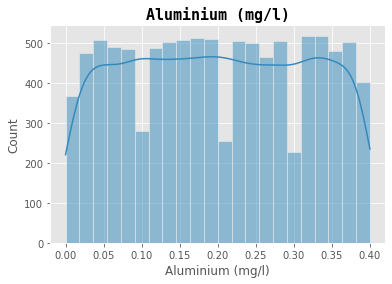

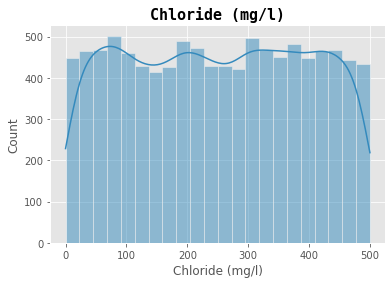

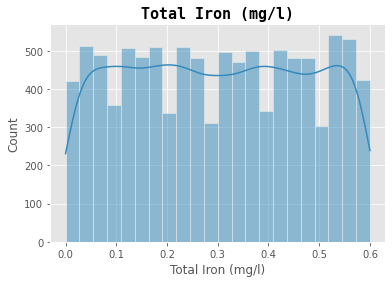

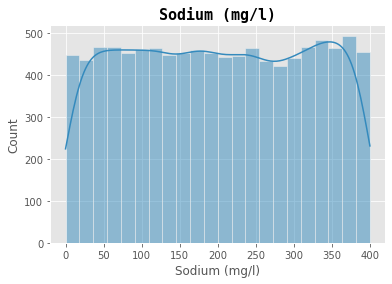

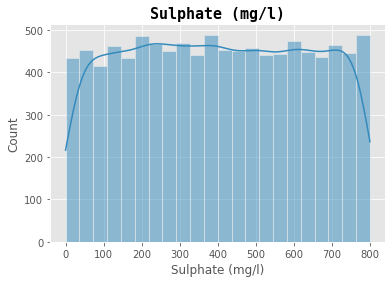

In [27]:
for b_col in cols:
    plt.figure()
    sns.histplot(data=df, x=b_col, kde=True)
    plt.title(b_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

### 4.9) histogram plots with pH and Potability

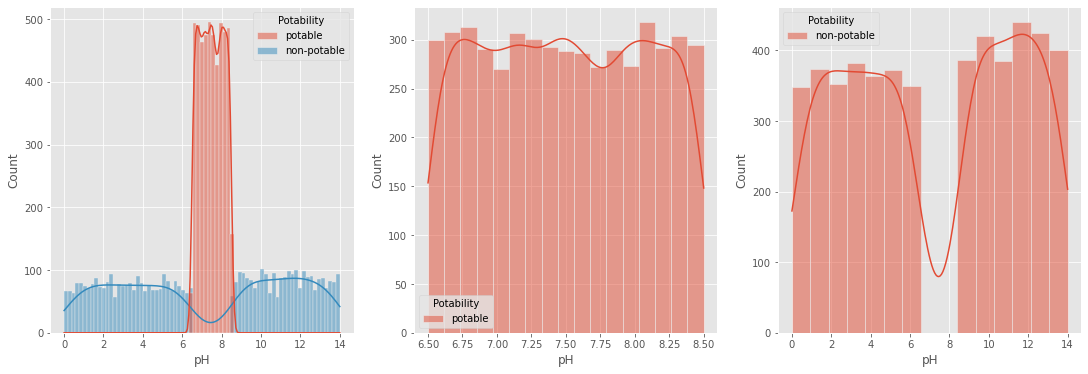

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='pH',kde=True,hue='Potability')
plt.subplot(142)
ax =sns.histplot(data=df[df.Potability=='potable'],x='pH',kde=True,hue='Potability')
plt.subplot(143)
ax =sns.histplot(data=df[df.Potability=='non-potable'],x='pH',kde=True,hue='Potability')
plt.show()


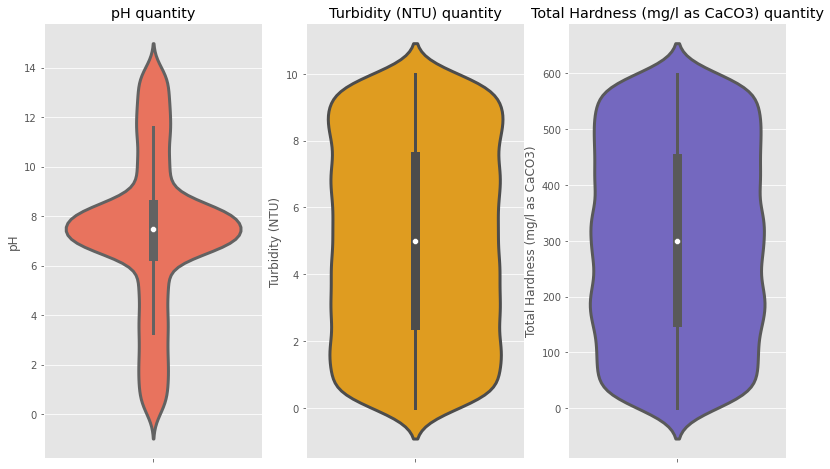

In [52]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('pH quantity')
sns.violinplot(y='pH',data=df,color='tomato',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Turbidity (NTU) quantity')
sns.violinplot(y='Turbidity (NTU)',data=df,color='orange',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Total Hardness (mg/l as CaCO3) quantity')
sns.violinplot(y='Total Hardness (mg/l as CaCO3)',data=df,color='slateblue',linewidth=3)
plt.show()

## Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

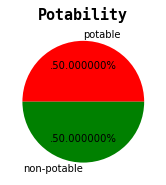

In [53]:
plt.subplot(1,2,1)
size = df['Potability'].value_counts()
labels = 'potable', 'non-potable'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Potability', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.axis('off')
